In [5]:
# Import required modules
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import re
import pprint
import glob
import pickle
import traceback
import logging
import os.path, time
from datetime import datetime, timedelta

# CSV files we have got so far

In [6]:
import os
for index,i in enumerate(sorted(os.listdir("csv/"))):
    print(index,i)

0 Business & entrepreneur.csv
1 Business & entrepreneurAuthors.csv
2 Commercial events.csv
3 Commercial eventsAuthors.csv
4 Complaints corner.csv
5 Complaints cornerAuthors.csv
6 Concerts.csv
7 ConcertsAuthors.csv
8 Daily life.csv
9 Daily lifeAuthors.csv
10 Education.csv
11 EducationAuthors.csv
12 Employment.csv
13 EmploymentAuthors.csv
14 Entertainment & dining.csv
15 Entertainment & diningAuthors.csv
16 Family mattershealth.csv
17 Family mattershealthAuthors.csv
18 Financebankingtaxation.csv
19 FinancebankingtaxationAuthors.csv
20 Food and drink.csv
21 Food and drinkAuthors.csv
22 Insurance.csv
23 InsuranceAuthors.csv
24 Introductions.csv
25 IntroductionsAuthors.csv
26 Language corner.csv
27 Language cornerAuthors.csv
28 Leaving Switzerland.csv
29 Leaving SwitzerlandAuthors.csv
30 Othergeneral.csv
31 OthergeneralAuthors.csv
32 Permitsvisasgovernment.csv
33 PermitsvisasgovernmentAuthors.csv
34 Pet corner.csv
35 Pet cornerAuthors.csv
36 Social events.csv
37 Social eventsAuthors.csv
38 

# Load all data at once

Loading thread text:

In [7]:
dfContainer={}
filenames = [fn for fn in glob.glob("csv/*.csv") 
         if not os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):
    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    dfContainer[re.sub(r'.csv','',os.path.basename(filename))]=df

# sorted(dataframes)
# dataFrames = pd.Series(dataFrames)
# df=pd.read_csv('Concerts',sep='\t',index_col=0)
# df

# dfContainer


In [26]:
dfAuthors={}
filenames = [fn for fn in glob.glob("csv/*.csv") 
         if os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):
    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    df = df[['topic','thread','user','views','replies','location','date','post','user_posts','since','exp','thanked','groaned','reputation']]
    dfAuthors[re.sub(r'.csv','',os.path.basename(filename))]=df
print(filenames,dfAuthors.keys())

dfAuthors['Business & entrepreneurAuthors'].head()
# dfAuthors['Business & entrepreneurAuthors'][['thread','user','date','post','user_posts','since','exp','thanked','groaned','reputation']]

['csv/ConcertsAuthors.csv', 'csv/OthergeneralAuthors.csv', 'csv/Food and drinkAuthors.csv', 'csv/Business & entrepreneurAuthors.csv', 'csv/EmploymentAuthors.csv', 'csv/TransportationdrivingAuthors.csv', 'csv/PermitsvisasgovernmentAuthors.csv', 'csv/EducationAuthors.csv', 'csv/Family mattershealthAuthors.csv', 'csv/FinancebankingtaxationAuthors.csv', 'csv/Swiss politicsnewsAuthors.csv', 'csv/Sports  Fitness  Beauty  WellnessAuthors.csv', 'csv/IntroductionsAuthors.csv', 'csv/Pet cornerAuthors.csv', 'csv/TVinternettelephoneAuthors.csv', 'csv/InsuranceAuthors.csv', 'csv/Swiss news via The LocalAuthors.csv', 'csv/Daily lifeAuthors.csv', 'csv/Entertainment & diningAuthors.csv', 'csv/SupportAuthors.csv', 'csv/Complaints cornerAuthors.csv', 'csv/Commercial eventsAuthors.csv', 'csv/Travelday tripsfree timeAuthors.csv', 'csv/Leaving SwitzerlandAuthors.csv', 'csv/Language cornerAuthors.csv', 'csv/Social eventsAuthors.csv'] dict_keys(['SupportAuthors', 'Entertainment & diningAuthors', 'Language co

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Business & entrepreneur,Posting in this area - guidelines - rules - re...,"""mark",17624,0,"Location: Zollikon, Switzerland","11.08.2006, 15:44",\r\n\t\t\t\r\n\t\t\tThis area is intended as ...,"Posts: 3,070",Join Date: May 2005,The Architect,Groaned at 3 Times in 3 Posts,Thanked 418 Times in 115 Posts,a reputation beyond repute
1,Business & entrepreneur,Questions about liability and invoicing of Fre...,"""Nano",139,2,Location: Solothurn,"Yesterday, 23:08",\r\n\t\t\t\r\n\t\t\tI work though my own GmbH...,Posts: 2,Join Date: Jan 2017,Newbie,Groaned at 0 Times in 0 Posts,Thanked 0 Times in 0 Posts,no particular reputation at present
2,Business & entrepreneur,Help for Businesses/Freelancers in CH,"""Richard",60525,319,Location: Luzern currently,"13.07.2007, 12:23",I can imagine they would try and avoid doi...,"Posts: 2,565",Join Date: May 2005,Forum Legend,Groaned at 4 Times in 4 Posts,Thanked 720 Times in 373 Posts,a reputation beyond repute
3,Business & entrepreneur,Becoming self-employed in Ticino [EU citizen],"""vulcan29",3647,26,Location: uk,"30.08.2014, 01:13","\r\n\t\t\t\r\n\t\t\tHi again, sorry for resur...",Posts: 12,Join Date: Aug 2014,Newbie 1st class,Groaned at 0 Times in 0 Posts,Thanked 1 Time in 1 Post,no particular reputation at present
4,Business & entrepreneur,importing goods,"""swissv",225,2,Location: Zurich,"02.01.2017, 14:43",\r\n\t\t\t\r\n\t\t\tWhether you can or not de...,Posts: 5,Join Date: Dec 2016,Newbie,Groaned at 0 Times in 0 Posts,Thanked 0 Times in 0 Posts,no particular reputation at present


In [27]:
# print(dfAuthors['Complaints cornerAuthors'].loc[dfAuthors['Complaints cornerAuthors']['since']=='Location: Lugano']['since'].index)
# # dfAuthors['Complaints cornerAuthors']=dfAuthors['Complaints cornerAuthors'].set_value( 'since',1642, 'null')
# wrongdata=set()
wrongdata=set()
[[wrongdata.add(key) for since in dfAuthors[key]['since'] if since=='Location: Lugano']for key in dfAuthors]
wrongdata

dfAuthors['Food and drinkAuthors'][dfAuthors['Food and drinkAuthors']['since']=='Location: Lugano']
# dfAuthors['Complaints cornerAuthors'][dfAuthors['Complaints cornerAuthors']['since']=='Location: Lugano']

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
3363,Food and drink,Ticino grocery shopping- do you do it in Switz...,Jasmine28,4814,24,Posts: 59,"16.04.2010, 16:08","Irony, I think I'd call it. Ready meals (...",Groaned at 14 Times in 7 Posts,Location: Lugano,Join Date: Dec 2009,Thanked 71 Times in 22 Posts,Hi,considered knowledgeable


In [28]:
for key in wrongdata:
#     dfAuthors[key]['since']=dfAuthors[key]['since'][dfAuthors[key].since.replace('Location: Lugano' , 'null')]
    ids=dfAuthors[key][dfAuthors[key]['since']=='Location: Lugano'].index
    dfAuthors[key]=dfAuthors[key].loc[dfAuthors[key].index ^ ids].reset_index()
    dfAuthors[key].drop('index',axis=1,inplace=True)
dfAuthors['Complaints cornerAuthors'].head()
# dfAuthors['Complaints cornerAuthors']=dfAuthors['Complaints cornerAuthors'][dfAuthors['Complaints cornerAuthors'].index!= ids]
# dfAuthors['Complaints cornerAuthors'].loc[1641:1645]

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Complaints corner,Ricardo-wrong product delivered,"""",969,47,Location: Zürich,"05.01.2017, 16:40",Actually it sounds more like opinions on a...,"Posts: 3,727",Join Date: Oct 2007,Forum Legend,Groaned at 385 Times in 202 Posts,"Thanked 1,178 Times in 756 Posts",m
1,Complaints corner,the great Swisscom cock pit bilk,"""armed_neutrality",267,8,Location: Vaud,"Today, 14:59",English is not your native language then?\...,Posts: 114,Join Date: May 2014,Member,Groaned at 7 Times in 2 Posts,Thanked 101 Times in 52 Posts,considered knowledgeable
2,Complaints corner,How to deal with difficult co-worker,"""Karl",5773,102,Location: Here,"30.12.2016, 06:14",\r\n\t\t\t\r\n\t\t\tblimey people are making ...,"Posts: 1,723",Join Date: Sep 2008,Forum Veteran,Groaned at 173 Times in 77 Posts,"Thanked 2,512 Times in 812 Posts",a reputation beyond repute
3,Complaints corner,**Warning ** Inter Discount** Warning**,"""KarlN",32366,189,Location: Zurich,"11.06.2009, 19:05",\r\n\t\t\t\r\n\t\t\tI wouldn't buy expensive ...,"Posts: 1,258",Join Date: Aug 2008,Forum Veteran,Groaned at 11 Times in 10 Posts,Thanked 301 Times in 183 Posts,a reputation beyond repute
4,Complaints corner,DHL are muppets,"""xynth",829,18,Location: Zurich,"04.01.2017, 20:23",Exactly.,Posts: 772,Join Date: Aug 2006,Forum Veteran,Groaned at 37 Times in 24 Posts,"Thanked 1,733 Times in 515 Posts",a reputation beyond repute


Clean and transform data

In [29]:
# # Casting views from str to int (- to 0 because is a moved)
today=datetime.strptime(time.ctime(os.path.getctime('csv/ConcertsAuthors.csv')),'%a %b %d %H:%M:%S %Y')
yesterday=today- timedelta(days=1)
tdy="%d.%d.%d" %(today.day,today.month,today.year)
ystr="%d.%d.%d" %(yesterday.day,yesterday.month,yesterday.year)

for key in dfContainer:
    dfContainer[key]['views']=dfContainer[key]['views'].apply(lambda x: str(x).replace(',',''))
    dfContainer[key]['replies']=dfContainer[key]['replies'].apply(lambda x: str(x).replace(',',''))
print(filenames)
for key in dfAuthors:
#     dfAuthors[key].user_posts=dfAuthors[key].apply(lambda x: x[9].replace('Posts: ','').replace(',','').replace('-','0') ,axis=1)
#     [print(key) for x in dfAuthors[key]['since'] if 'Location: Lugano' in x]
#     dfAuthors[key]['views']=dfAuthors[key]['views'].apply(lambda x: int(x.replace(',','').replace('-','0')))
#   dfAuthors[key]['replies']=dfAuthors[key]['replies'].apply(lambda x: int(str(x).replace(',','').replace('-','0')))
    dfAuthors[key]['user_posts']=dfAuthors[key]['user_posts'].apply(lambda x: ''.join(re.findall(r'\d+',x)))
    dfAuthors[key]['user']=dfAuthors[key]['user'].apply(lambda x: str(x).replace(str(x)[0],'') if((str(x)[0])=='"') else str(x))
    dfAuthors[key]['date']=dfAuthors[key]['date'].apply(lambda x: str(x))
    dfAuthors[key]['date']=dfAuthors[key]['date'].apply(lambda x: x.replace('null',("1.1.0001, 00:00")))
    dfAuthors[key]['date']=dfAuthors[key]['date'].apply(lambda x: x.replace('Yesterday',ystr))
    dfAuthors[key]['date']=dfAuthors[key]['date'].apply(lambda x: x.replace('Today',tdy))
#     dfAuthors[key]['date']=[datetime.strptime(x, '%d.%m.%Y, %H:%M')for x in dfAuthors[key]['date'] if (x!='null')]
    dfAuthors[key]['since']=dfAuthors[key]['since'].apply(lambda x: str(x))
    dfAuthors[key]['since']=dfAuthors[key]['since'].apply(lambda x: x.replace('Join Date:',''))
    dfAuthors[key]['since']=dfAuthors[key]['since'].apply(lambda x: x.replace('null',(" Jun 0001")))
#     dfAuthors[key]['since']=[datetime.strptime(x, ' %b %Y')for x in dfAuthors[key]['since']]
    dfAuthors[key]['location']=dfAuthors[key]['location'].apply(lambda x: x.replace('Location: ',''))
dfAuthors[key].head()
# print(filenames)


['csv/ConcertsAuthors.csv', 'csv/OthergeneralAuthors.csv', 'csv/Food and drinkAuthors.csv', 'csv/Business & entrepreneurAuthors.csv', 'csv/EmploymentAuthors.csv', 'csv/TransportationdrivingAuthors.csv', 'csv/PermitsvisasgovernmentAuthors.csv', 'csv/EducationAuthors.csv', 'csv/Family mattershealthAuthors.csv', 'csv/FinancebankingtaxationAuthors.csv', 'csv/Swiss politicsnewsAuthors.csv', 'csv/Sports  Fitness  Beauty  WellnessAuthors.csv', 'csv/IntroductionsAuthors.csv', 'csv/Pet cornerAuthors.csv', 'csv/TVinternettelephoneAuthors.csv', 'csv/InsuranceAuthors.csv', 'csv/Swiss news via The LocalAuthors.csv', 'csv/Daily lifeAuthors.csv', 'csv/Entertainment & diningAuthors.csv', 'csv/SupportAuthors.csv', 'csv/Complaints cornerAuthors.csv', 'csv/Commercial eventsAuthors.csv', 'csv/Travelday tripsfree timeAuthors.csv', 'csv/Leaving SwitzerlandAuthors.csv', 'csv/Language cornerAuthors.csv', 'csv/Social eventsAuthors.csv']


,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Transportationdriving,"Serious Speeding - the law, the fines.",guest,"134,880",575,null,"1.1.0001, 00:00",\r\n\t\t\t\r\n\t\t\tStill looking for the sit...,,Jun 0001,null,null,null,null
1,Transportationdriving,Car and engine cleaning pre mfk test,DadaSun,"37,509",91,Basel,"18.06.2013, 16:57",Look for a loose connection on a plug to t...,9,Jan 2011,Newbie,Groaned at 0 Times in 0 Posts,Thanked 2 Times in 2 Posts,become a little unpopular
2,Transportationdriving,How to PRIVATELY import a car EU to CH,Cambo351,"78,660",201,"Sydney, Australia","29.06.2012, 09:54",\r\n\t\t\t\r\n\t\t\tInsurance for the drive f...,106,Aug 2009,Member,Groaned at 0 Times in 0 Posts,Thanked 100 Times in 44 Posts,earned some respect
3,Transportationdriving,Traffic Offences - Q & A Bullet points,guest,"52,412",73,null,"1.1.0001, 00:00",\r\n\t\t\t\r\n\t\t\tHey \r\nThis is such a ...,,Jun 0001,null,null,null,null
4,Transportationdriving,[Drivers licence] Conversion and questions,gooner,"309,410","1,378",ch,"21.02.2006, 11:14",\r\n\t\t\t\r\n\t\t\tI have asked out converti...,2291,Dec 2005,Forum Veteran,Groaned at 37 Times in 37 Posts,"Thanked 1,623 Times in 836 Posts",a reputation beyond repute
5,Transportationdriving,The Swiss Public Transport System,Longbyt,"68,733",108,ZH,"14.09.2010, 18:03",\r\n\t\t\t\r\n\t\t\tOne point worth making is...,7381,Apr 2008,Forum Legend,Groaned at 56 Times in 52 Posts,"Thanked 11,153 Times in 4,154 Posts",a reputation beyond repute
6,Transportationdriving,Blocking personal information from eAutoIndex,guest,"27,000",38,null,"1.1.0001, 00:00",\r\n\t\t\t\r\n\t\t\tExcellent. In less than ...,,Jun 0001,null,null,null,null
7,Transportationdriving,Vehicle Import Duties,dodgyken,"17,390",1,Democratic Republic Kenistan,"29.06.2011, 10:19",\r\n\t\t\t\r\n\t\t\tHere is a current link (2...,9936,Apr 2010,Forum Legend,Groaned at 342 Times in 278 Posts,"Thanked 17,713 Times in 6,765 Posts",a reputation beyond repute
8,Transportationdriving,Alcohol test kit required for driving in Franc...,guest,"70,187",147,null,"1.1.0001, 00:00",\r\n\t\t\t\r\n\t\t\tI always carry a large fr...,,Jun 0001,null,null,null,null
9,Transportationdriving,My experience importing a car from germany to ...,bobo_97,"43,573",87,Baar,"27.07.2011, 11:44",\r\n\t\t\t\r\n\t\t\tCould anyone tell me when...,276,Sep 2008,Senior Member,Groaned at 2 Times in 2 Posts,Thanked 111 Times in 53 Posts,earned the respect of many


Reputation transformation. Basic transformation:

In [9]:
print('Reputation values: ',dfAuthors['Business & entrepreneurAuthors']['reputation'].unique())
d = {}
d["a reputation beyond repute"] = 6 # 
d["an excellent reputation"] = 5 # 
d["considered knowledgeable"] = 4 #
d["earned the respect of many"] = 3 #
d["earned some respect"] = 2#
d["made some interesting contributions"] = 1 #
d["no particular reputation at present"] = 0#1
d["slipped a little"] = -1 #0
d["become a little unpopular"] = -2 #
d["annoyed a few people around here"] = -3 #
d["considered a nuisance"] = -4 #
d["considered unworthy"] = -5 #
d["null"] = np.nan


# for key in dfAuthors:
# #     print(key)
#     for i in dfAuthors[key]['reputation'].unique():
#         uniques.add(i)
#     dfAuthors[key]['reputation']=dfAuthors[key]['reputation'].apply(lambda x: d[x] if(len(str(x))>3) else np.nan)
# # dfAuthors['EducationAuthors'].head()
# print('all rep values',uniques)


Reputation values:  ['a reputation beyond repute' 'no particular reputation at present'
 'become a little unpopular' 'earned some respect' 'slipped a little'
 'made some interesting contributions' 'considered knowledgeable'
 'earned the respect of many' 'null' 'annoyed a few people around here'
 'considered unworthy' 'an excellent reputation' 'considered a nuisance'
 nan 'u' 'a']


In [10]:
uniques=set()
[[uniques.add(user_exp) for user_exp in dfAuthors[key]['reputation'] if user_exp not in list(d.keys())]for key in dfAuthors]
uniques

{nan, 'h', 'a', 'm', 'u'}

In [11]:
# temp=map(d.get, dfAuthors['EducationAuthors']['reputation'], dfAuthors['EducationAuthors']['reputation'])
for key in dfAuthors:
    dfAuthors[key]['reputation']=[d.get(item,item)  for item in dfAuthors[key]['reputation']]
dfAuthors['Business & entrepreneurAuthors'].head()


,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Business & entrepreneur,Posting in this area - guidelines - rules - re...,mark,17624,0,"Zollikon, Switzerland",2006-08-11 15:44:00,\r\n\t\t\t\r\n\t\t\tThis area is intended as ...,3070,2005-05-01 00:00:00,The Architect,Groaned at 3 Times in 3 Posts,Thanked 418 Times in 115 Posts,6
1,Business & entrepreneur,Questions about liability and invoicing of Fre...,Nano,139,2,Solothurn,2017-01-11 23:08:00,\r\n\t\t\t\r\n\t\t\tI work though my own GmbH...,2,2017-01-01 00:00:00,Newbie,Groaned at 0 Times in 0 Posts,Thanked 0 Times in 0 Posts,0
2,Business & entrepreneur,Help for Businesses/Freelancers in CH,Richard,60525,319,Luzern currently,2007-07-13 12:23:00,I can imagine they would try and avoid doi...,2565,2005-05-01 00:00:00,Forum Legend,Groaned at 4 Times in 4 Posts,Thanked 720 Times in 373 Posts,6
3,Business & entrepreneur,Becoming self-employed in Ticino [EU citizen],vulcan29,3647,26,uk,2014-08-30 01:13:00,"\r\n\t\t\t\r\n\t\t\tHi again, sorry for resur...",12,2014-08-01 00:00:00,Newbie 1st class,Groaned at 0 Times in 0 Posts,Thanked 1 Time in 1 Post,0
4,Business & entrepreneur,importing goods,swissv,225,2,Zurich,2017-01-02 14:43:00,\r\n\t\t\t\r\n\t\t\tWhether you can or not de...,5,2016-12-01 00:00:00,Newbie,Groaned at 0 Times in 0 Posts,Thanked 0 Times in 0 Posts,0


In [12]:
print('Reputation values: ',dfAuthors['EducationAuthors']['exp'].unique())
# Basic exp
d = {}
d["Newbie"] = 0 # 
d["Newbie 1st class"] = 1 #
d["Junior Member"] = 2 #
d["Member"] = 3#
d["Senior Member"] = 4 #
d["Forum Veteran"] = 5#1
d["Forum Legend"] = 6 #0
d["Commercial paid-placement ads"] = 7 # 
d["Banned"] = -1 #
d["null"] = np.nan #

Reputation values:  ['Commercial paid-placement ads' 'Forum Legend' 'null' 'Newbie'
 'Newbie 1st class' 'Banned' 'Forum Veteran' 'Member' 'Senior Member'
 'Junior Member' 'modified and reprogrammed']


There are some special rols:

In [13]:
other_rols=set()
[[other_rols.add(user_exp) for user_exp in dfAuthors[key]['exp'] if user_exp not in list(d.keys())]for key in dfAuthors]
other_rols

{'A singular modality',
 'Moddy McModface',
 'Moderately Amused',
 'Moderato espressivo',
 'Only in moderation',
 'RIP',
 'Scammer until he proves otherwise',
 'The Architect',
 'Unbridled Mod',
 'modified and reprogrammed',
 'à la mod'}

Because they aren't so many of them. We will parse them manually. 

In [14]:
# dfAuthors['EducationAuthors'].head()
d["A singular modality"] = 8 # Special rol
d["Moderately Amused"] = 8 # Special rol
d["Only in moderation"] = 8 # Special rol
d["The Architect"] = 8 # Special rol
d["Unbridled Mod"] = 8 # Special rol
d["à la mod"] = 8 #
d["RIP"] = 8 # Special rol
d["Moddy McModface"] = 8 # Special rol
d["Moderato espressivo"] = 8 # Special rol
d["modified and reprogrammed"] = 8 #

# temp=map(d.get, dfAuthors['EducationAuthors']['reputation'], dfAuthors['EducationAuthors']['reputation'])
for key in dfAuthors:
    dfAuthors[key]['exp']=[d.get(item,item)  for item in dfAuthors[key]['exp']]
# dfAuthors['Complaints cornerAuthors'][(dfAuthors['Complaints cornerAuthors']['exp']=='Join Date: Dec 2009')]
print('Exp values: ',dfAuthors['Complaints cornerAuthors']['exp'].unique())
print('Exp values: ',dfAuthors['Business & entrepreneurAuthors']['exp'].unique())


Exp values:  [  6.   3.   5.   2.  nan   4.   8.   0.   1.  -1.]
Exp values:  [  8.   0.   6.   1.   2.   4.   5.   3.  nan  -1.]


Thanked and groaned parse

In [15]:
# Thanked 418 Times in 115 
# Groaned at 3 Times in 3 Posts
for key in dfAuthors:
    dfAuthors[key]['groaned']=dfAuthors[key]['groaned'].apply(lambda x: re.findall(r'\d+',x))
    dfAuthors[key]['thanked']=dfAuthors[key]['thanked'].apply(lambda x: re.findall(r'\d+',x))
dfAuthors['Business & entrepreneurAuthors'].head()

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Business & entrepreneur,Posting in this area - guidelines - rules - re...,mark,17624,0,"Zollikon, Switzerland",2006-08-11 15:44:00,\r\n\t\t\t\r\n\t\t\tThis area is intended as ...,3070,2005-05-01 00:00:00,8.0,"[3, 3]","[418, 115]",6
1,Business & entrepreneur,Questions about liability and invoicing of Fre...,Nano,139,2,Solothurn,2017-01-11 23:08:00,\r\n\t\t\t\r\n\t\t\tI work though my own GmbH...,2,2017-01-01 00:00:00,0.0,"[0, 0]","[0, 0]",0
2,Business & entrepreneur,Help for Businesses/Freelancers in CH,Richard,60525,319,Luzern currently,2007-07-13 12:23:00,I can imagine they would try and avoid doi...,2565,2005-05-01 00:00:00,6.0,"[4, 4]","[720, 373]",6
3,Business & entrepreneur,Becoming self-employed in Ticino [EU citizen],vulcan29,3647,26,uk,2014-08-30 01:13:00,"\r\n\t\t\t\r\n\t\t\tHi again, sorry for resur...",12,2014-08-01 00:00:00,1.0,"[0, 0]","[1, 1]",0
4,Business & entrepreneur,importing goods,swissv,225,2,Zurich,2017-01-02 14:43:00,\r\n\t\t\t\r\n\t\t\tWhether you can or not de...,5,2016-12-01 00:00:00,0.0,"[0, 0]","[0, 0]",0


In [16]:
dfAuthors['Business & entrepreneurAuthors'].head()

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Business & entrepreneur,Posting in this area - guidelines - rules - re...,mark,17624,0,"Zollikon, Switzerland",2006-08-11 15:44:00,\r\n\t\t\t\r\n\t\t\tThis area is intended as ...,3070,2005-05-01 00:00:00,8.0,"[3, 3]","[418, 115]",6
1,Business & entrepreneur,Questions about liability and invoicing of Fre...,Nano,139,2,Solothurn,2017-01-11 23:08:00,\r\n\t\t\t\r\n\t\t\tI work though my own GmbH...,2,2017-01-01 00:00:00,0.0,"[0, 0]","[0, 0]",0
2,Business & entrepreneur,Help for Businesses/Freelancers in CH,Richard,60525,319,Luzern currently,2007-07-13 12:23:00,I can imagine they would try and avoid doi...,2565,2005-05-01 00:00:00,6.0,"[4, 4]","[720, 373]",6
3,Business & entrepreneur,Becoming self-employed in Ticino [EU citizen],vulcan29,3647,26,uk,2014-08-30 01:13:00,"\r\n\t\t\t\r\n\t\t\tHi again, sorry for resur...",12,2014-08-01 00:00:00,1.0,"[0, 0]","[1, 1]",0
4,Business & entrepreneur,importing goods,swissv,225,2,Zurich,2017-01-02 14:43:00,\r\n\t\t\t\r\n\t\t\tWhether you can or not de...,5,2016-12-01 00:00:00,0.0,"[0, 0]","[0, 0]",0


# Plotting
We will first transform our string data to integers, so we can plot it. Then we will join al interesting data in a df and obtain general statistical information.

In [17]:
# Run it just ones.
for key in dfContainer:
    dfContainer[key]['views']=dfContainer[key]['views'].apply(lambda x: int(x.replace(',','').replace('-','0')))
    dfContainer[key]['replies']=dfContainer[key]['replies'].apply(lambda x: int(str(x).replace(',','').replace('-','0')))


In [18]:
moreViews=pd.DataFrame()
Views=pd.DataFrame()
viewsStats=pd.DataFrame()
repliesStats=pd.DataFrame()
for key in dfContainer:
#     dfContainer[key].views=dfContainer[key].apply(lambda x: int(x[4].replace(',','').replace('-','0')),axis=1)
    viewsStats[key]=dfContainer[key].describe()['views']
    repliesStats[key]=dfContainer[key].describe()['replies']
    temp=dfContainer[key][['threads','views']]
    temp2=temp.sort_values('views',ascending=0)[:4]['views']
    temp2.index=[np.arange(4)]
    Views[key]=temp2
    temp=temp.sort_values('views',ascending=0)[:4]
    temp['index2']=key
    temp.index=[temp.index2,temp.threads]
    temp=temp.drop(['index2','threads'],1)
    moreViews=moreViews.append(temp)


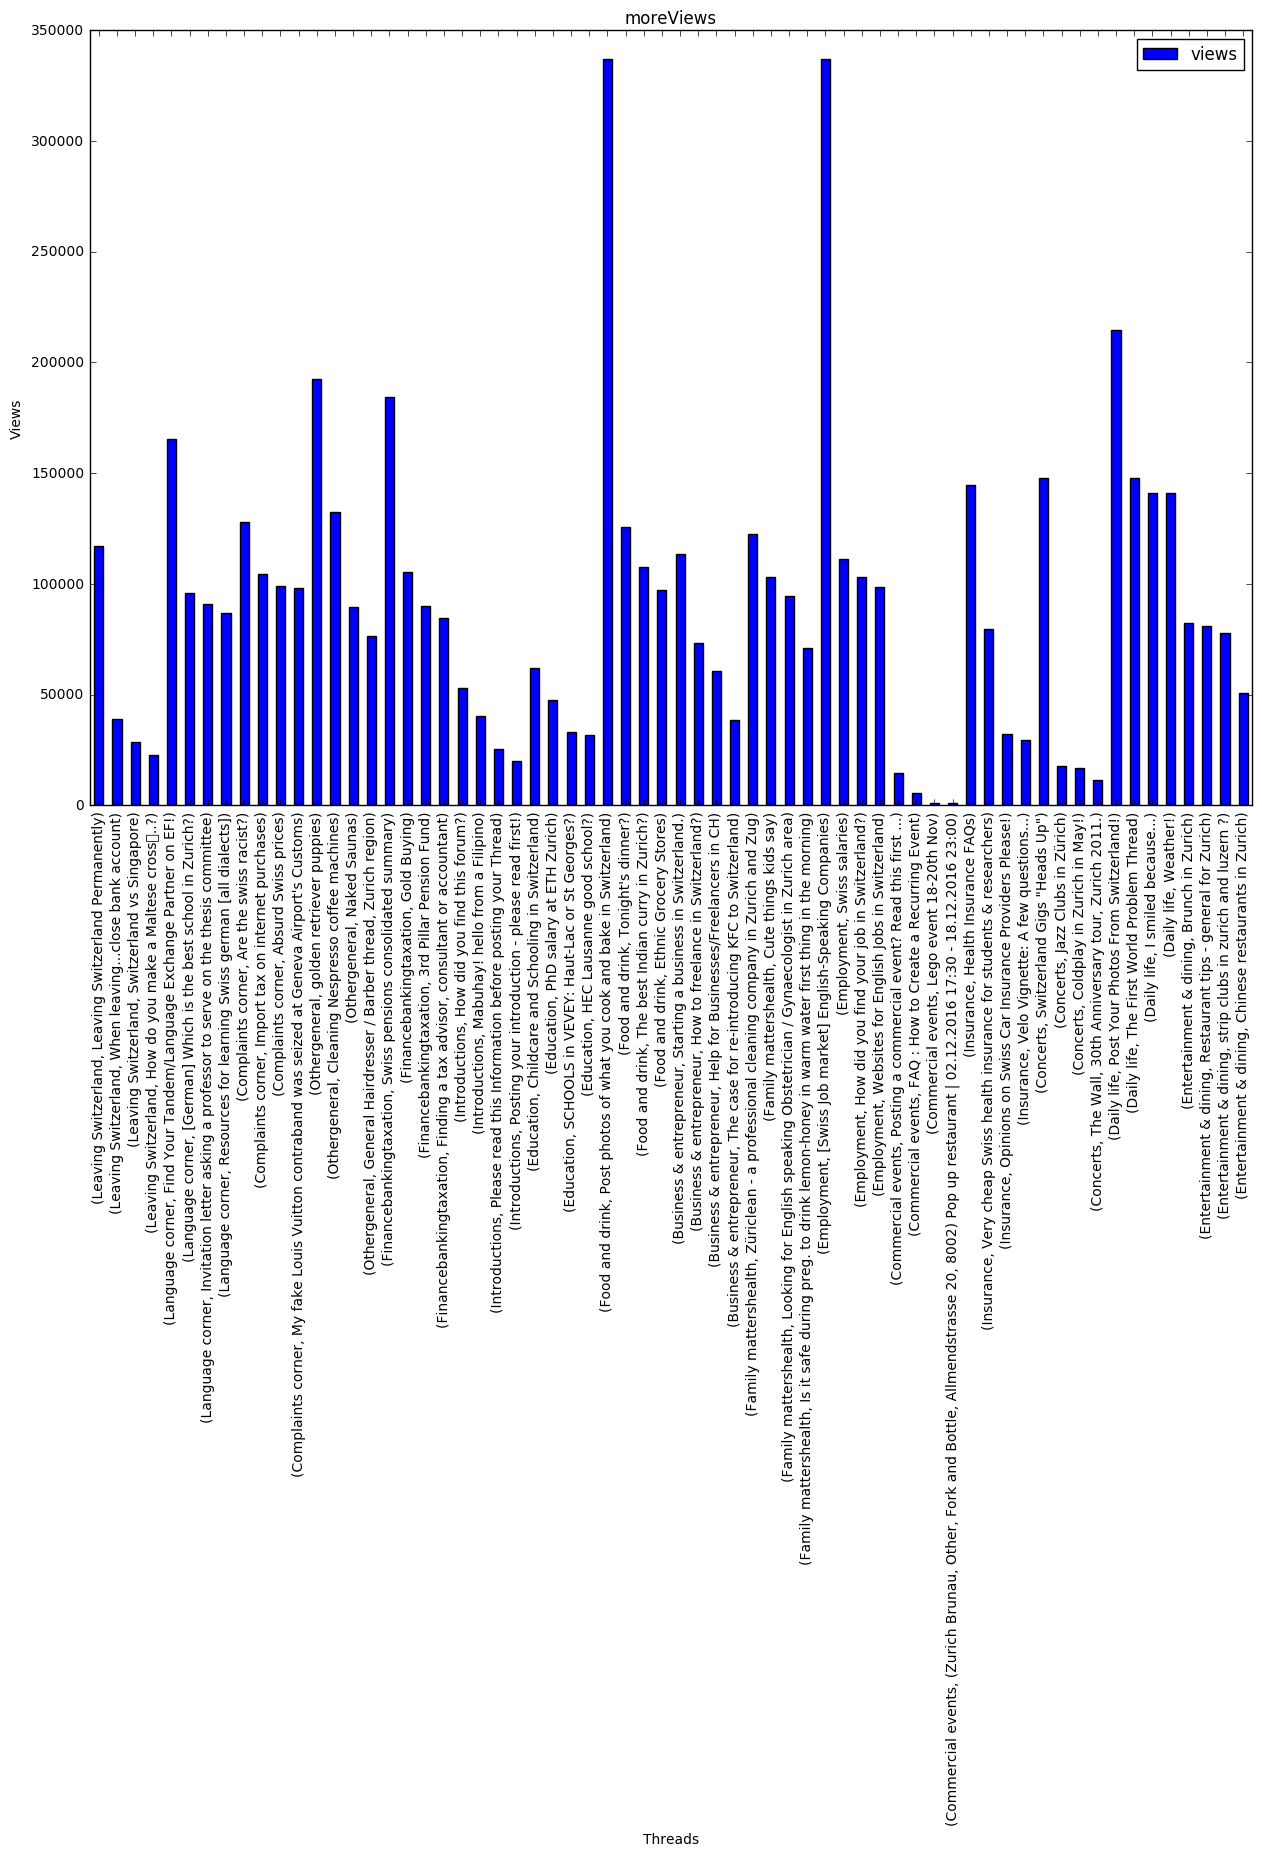

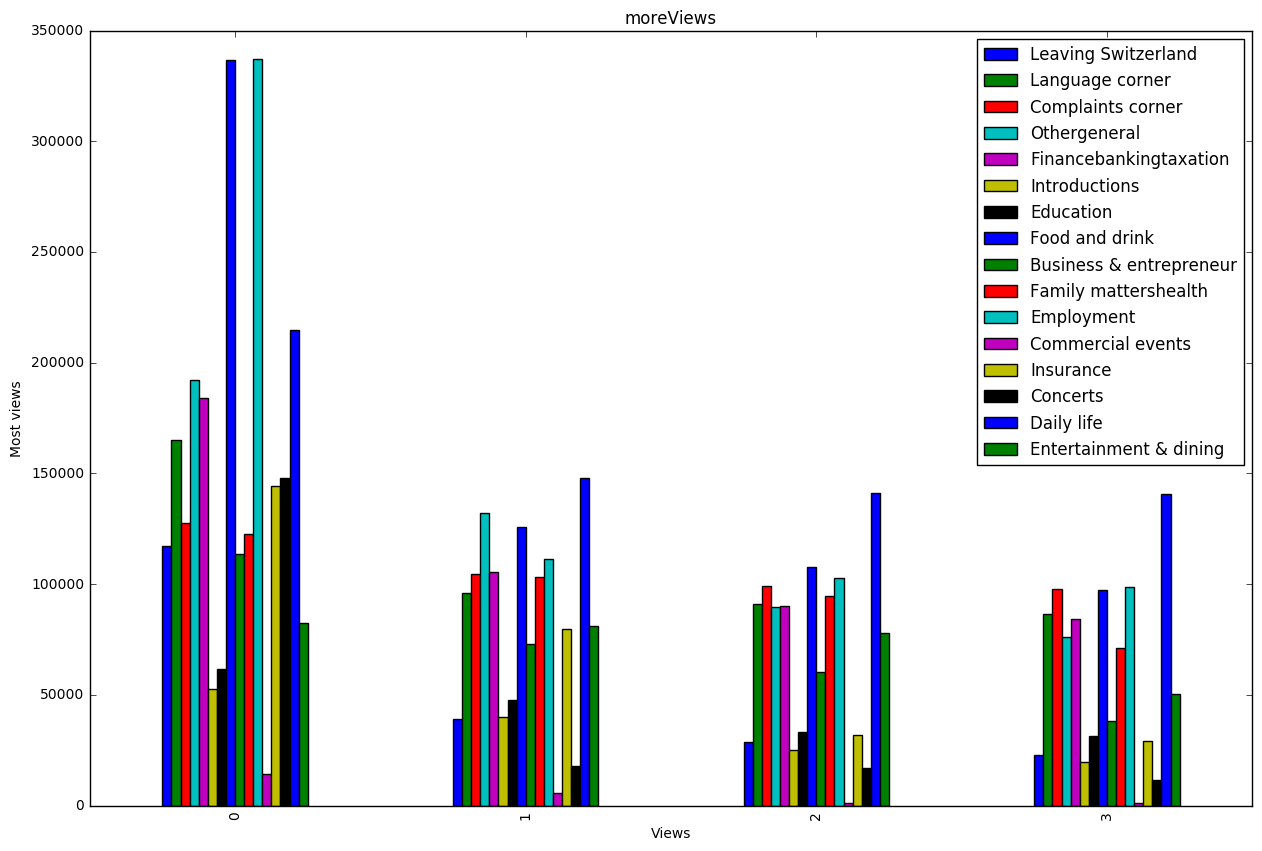

views
index2                  threads                                                   
Leaving Switzerland     Leaving Switzerland Permanently                     117144
                        When leaving...close bank account                    39045
                        Switzerland vs Singapore                             28713
                        How do you make a Maltese cross
..?                  22746
Language corner         Find Your Tandem/Language Exchange Partner on EF!   165236
                        [German] Which is the best school in Zurich?         95817
                        Invitation letter asking a professor to serve o...   91088
                        Resources for learning Swiss german [all dialects]   86619
Complaints corner       Are the swiss racist?                               127714
                        Import tax on internet purchases                    104442
                        Absurd Swiss prices                                  99148
                        My fake Louis Vuitton contraband was seized at ...   98053
Othergeneral            golden retriever puppies                            192340
                        Cleaning Nespresso coffee machines                  132307
                        Naked Saunas                                         89733
                        General Hairdresser / Barber thread, Zurich region   76273
Financebankingtaxation  Swiss pensions consolidated summary                 184224
                        Gold Buying                                         105543
                        3rd Pillar Pension Fund                              89934
                        Finding a tax advisor, consultant or accountant      84466
Introductions           How did you find this forum?                         52843
                        Mabuhay! hello from a Filipino                       40185
                        Please read this Information before posting you...   25248
                        Posting your introduction - please read first!       19805
Education               Childcare and Schooling in Switzerland               61863
                        PhD salary at ETH Zurich                             47754
                        SCHOOLS in VEVEY: Haut-Lac or St Georges?            33054
                        HEC Lausanne good school?                            31597
Food and drink          Post photos of what you cook and bake in Switze...  336871
                        Tonight's dinner?                                   125659
...                                                                            ...
Business & entrepreneur Help for Businesses/Freelancers in CH                60525
                        The case for re-introducing KFC to Switzerland       38327
Family mattershealth    Züriclean - a professional cleaning company in ...  122699
                        Cute things kids say                                103110
                        Looking for English speaking Obstetrician / Gyn...   94713
                        Is it safe during preg. to drink lemon-honey in...   71070
Employment              [Swiss Job market] English-Speaking Companies       337121
                        Swiss salaries                                      111274
                        How did you find your job in Switzerland?           102890
                        Websites for English Jobs in Switzerland             98560
Commercial events       Posting a commercial event? Read this first ...      14473
                        FAQ : How to Create a Recurring Event                 5586
                        Lego event 18-20th Nov                                1241
                        (Zurich Brunau, Other, Fork and Bottle, Allmend...    1051
Insurance               Health Insurance FAQs                               144466
                        Very cheap Swiss health insurance for students ...   79813
          

In [19]:
# temp=dfContainer['Business & entrepreneur'][['threads','views']]
# temp=temp.sort_values('views',ascending=0)
# temp2=temp[:3].append(temp[3:4])
# temp2['index2']='a'
# temp2.index=[temp2.index2,np.arange(4)]
# temp2.drop('index2',1)
# temp3=temp[4:8]
# temp3['index2']='b'
# temp3.index=[temp3.index2,np.arange(4)]
# temp2.append(temp3)
moreViews.plot.bar(figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Threads')
plt.ylabel('Views')
Views.plot(kind='bar',figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Views')
plt.ylabel('Most views')
plt.show()
Views
moreViews

In [18]:
viewsStats

,Commercial events,Language corner,Family mattershealth,Education,Othergeneral,Entertainment & dining,Leaving Switzerland,Insurance,Financebankingtaxation,Daily life,Introductions,Complaints corner,Concerts,Food and drink,Business & entrepreneur,Employment
count,48.000000,3028.000000,7284.000000,1337.000000,8187.000000,1729.000000,1011.000000,1959.000000,5776.000000,11390.000000,13379.000000,3056.000000,849.000000,4248.000000,2117.000000,6206.000000
mean,839.416667,2682.833554,2713.388797,1864.363500,2730.984488,3313.116252,2575.684471,2416.063298,2808.274931,3148.928183,954.654982,4430.026505,1590.957597,3312.927024,2282.867737,2881.488237
std,2152.131628,5792.833416,4086.472894,2991.731303,4930.084400,5277.330614,4708.098245,4407.505635,5025.480927,5914.934703,1060.230704,6729.518466,5188.770999,6931.074290,3858.961418,6447.636503
min,170.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,288.500000,928.750000,987.000000,845.000000,940.000000,1145.000000,1088.000000,1122.500000,1044.750000,947.000000,569.000000,1511.500000,901.000000,1174.500000,1045.000000,1048.000000
50%,408.000000,1420.000000,1652.000000,1228.000000,1514.000000,1801.000000,1620.000000,1629.000000,1641.500000,1648.500000,725.000000,2676.000000,1141.000000,2026.000000,1489.000000,1619.500000
75%,537.000000,2533.000000,2999.000000,1881.000000,2777.000000,3395.000000,2614.000000,2572.500000,2884.500000,3307.000000,998.000000,5086.000000,1498.000000,3719.750000,2424.000000,2885.750000
max,14473.000000,165236.000000,122699.000000,61863.000000,192340.000000,82366.000000,117144.000000,144466.000000,184224.000000,214706.000000,52843.000000,127714.000000,147999.000000,336871.000000,113495.000000,337121.000000


In [19]:
repliesStats

,Commercial events,Language corner,Family mattershealth,Education,Othergeneral,Entertainment & dining,Leaving Switzerland,Insurance,Financebankingtaxation,Daily life,Introductions,Complaints corner,Concerts,Food and drink,Business & entrepreneur,Employment
count,48.000000,3028.000000,7284.000000,1337.000000,8187.000000,1729.000000,1011.000000,1959.000000,5776.000000,11390.000000,13379.000000,3056.000000,849.000000,4248.000000,2117.000000,6206.000000
mean,2.104167,10.430978,14.832098,9.133134,10.842311,10.812608,11.321464,10.202654,11.777181,23.040825,6.495926,48.819699,5.167256,19.336158,9.912612,11.862391
std,4.501723,24.720095,31.402315,15.914637,21.558548,21.565003,21.088839,17.112297,27.032577,58.916850,10.292168,88.862434,38.618787,58.173421,24.554912,19.089089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,11.000000,0.000000,4.000000,2.000000,2.000000
50%,0.000000,4.000000,6.000000,4.000000,5.000000,4.000000,5.000000,6.000000,6.000000,9.000000,4.000000,26.000000,1.000000,9.000000,5.000000,6.000000
75%,2.000000,11.000000,15.000000,10.000000,12.000000,11.000000,12.000000,12.000000,13.000000,24.000000,8.000000,57.000000,4.000000,22.000000,11.000000,14.000000
max,22.000000,747.000000,1016.000000,280.000000,632.000000,320.000000,249.000000,403.000000,1126.000000,2607.000000,462.000000,2000.000000,1100.000000,2766.000000,770.000000,453.000000


# Obj Saver
This will be excluded from GitHub beacuse of the objs sizes.

In [20]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

## WordCloud

In [22]:
from wordcloud import WordCloud, STOPWORDS
import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop = set(stopwords.words('english'))
stop.update([".",",","?",")","(",":","/","!","%","-",""])
stop.update(STOPWORDS)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
wnl = WordNetLemmatizer()
forumTextContainer={}
i=0
for key in dfContainer:
    temp=dfContainer[key]
    lista=[]
    print(i)
    print("There are %s null values" %temp.isnull().values.sum())
    temp=temp.dropna()
    for thread in (temp.values):
        allwords=[]
#         if not type(thread[1])==float: # moved thread or privated
        text_tk = nltk.word_tokenize(thread[1]) 
        word_tag_fd = nltk.pos_tag(text_tk,tagset='universal') # for simplifying the task, we will une the universal tagset
        for wt in word_tag_fd:
            if  (wt[0] not in stop) and (wt[1] == 'NOUN' or wt[1] == 'ADJ'):
                allwords.append(wnl.lemmatize(wt[0]))
            elif (wt[0] not in stop) and (wt[1] == 'VERB'):
                allwords.append(wnl.lemmatize(wt[0],'v'))
                        
#         allwords=[wnl.lemmatize(wt[0]) for wt in word_tag_fd if  (wt[0] not in stop) and (wt[1] == 'NOUN' or wt[1] == 'ADJ')]
          
    #         allnoun=[wt[0] for wt in word_tag_fd if (wt[1] == 'NOUN' and wt[0] not in stop)] 
    #         # We want to do a wordcloud just of the nouns
    #         allverb=[wt[0] for wt in word_tag_fd if (wt[1] == 'VERB'and wt[0] not in stop)]
        lista.append((thread[3],allwords))
           
    forumTextContainer[key]=(lista)
    i+=1
# print(temp.loc[2].threads)
# word_c=WordCloud()
# wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate(pd.Series(allnoun).str.cat(sep=' '))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()
save_obj(forumTextContainer, 'forumTextContainer') 



0
There are 21 null values
1
There are 0 null values
2
There are 4 null values
3
There are 1 null values


KeyboardInterrupt: 

## Loading TK

In [30]:
# Loading threads tk
forumTextContainer=load_obj('forumTextContainer')

In [ ]:
# forumTextContainer['Education'][0]
from collections import defaultdict
from nltk.probability import ConditionalFreqDist
from gensim import corpora, models, similarities
from gensim.models import  ldamodel
frequency = defaultdict(int)
# Counting the freq of the words in a topic. (stopwords already done)
print(forumTextContainer.keys())
for thread in forumTextContainer['Housing in general']:
    for token in thread[1]:
        if len(token)>3:
            frequency[token] += 1


# [(k, frequency[k]) for k in sorted(frequency, key=frequency.get, reverse=True)]
words=[(k, frequency[k]) for k in sorted(frequency, key=frequency.get, reverse=True)]
word_c=WordCloud()
wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



## Topic modeling for threads

In [ ]:
pp=pprint.PrettyPrinter(compact=1)
frequency = defaultdict(int)
# Here, we will count the frequency of the words in all the topic
for thread in forumTextContainer['Education']:
    for token in thread[1]:
        if len(token)>3:
            frequency[token] += 1
# Now, we will remove words that have a small value of freq compared with the length of the thread.
# We also organize our tokens in a list per thread
texts = [[token for token in threads[1] if frequency[token]> math.ceil(len(threads[1])/15)] # The really huge topics are reduced
         for threads in forumTextContainer['Education']]

dictionary = corpora.Dictionary(texts)
print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus, normalize=True)
corpus_tfidf = tfidf[corpus]
print("Number of threads: %d"%len(corpus))

In [ ]:
lsi = models.LsiModel(corpus_tfidf,id2word=dictionary, num_topics=10)

topics=[" ".join(re.findall("\"[a-z]+\"",topic[1])) for topic in lsi.print_topics(10,20)]
[(print("topic %d: %s \n" %(i,topic)) ) for (i,topic) in enumerate(topics)]

## Searching Queries
We will use the lsi Vector Space Model algorithms because performs better than Tf-Idf and works enough fast.

In [ ]:
new_doc = "Study at the university EPFL in Lausanne with master thesis"
new_vec = dictionary.doc2bow(new_doc.lower().split())
# # index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)
# index = similarities.Similarity('/tmp/tst', corpus, num_features=12)
vec_lsi = lsi[new_vec] # convert the query to LSI space
index = similarities.MatrixSimilarity(lsi[corpus]) # transform corpus to LSI space and index it
sims = index[vec_lsi] # perform a similarity query against the corpus
sims = sorted(enumerate(sims), key=lambda item: -item[1])
[(print("Thread: %s --> %s \n" %(forumTextContainer['Education'][search[0]][0],search)) ) for search in sims[:10]]

In [ ]:
text_tk = nltk.word_tokenize(strForum) 
word_tag_fd = nltk.pos_tag(text_tk,tagset='universal') # for simplifying the task, we will une the universal tagset
allwords=[wt[0] for wt in word_tag_fd if  wt[0] not in stop]
word_c=WordCloud()
wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate(pd.Series(allwords).str.cat(sep=' '))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# def comments(thread):
#     # Scrape the HTML at the url
#     response = requests.get(thread,headers={'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'})
#     # Turn the HTML into a Beautiful Soup object
#     soup = BeautifulSoup(response.text, 'lxml')
#     comments={}
#     for link in soup.find_all("div",{"align":"center"}):
#         for link2 in link.find_all("div",{"align":"left"}):
#             for link3 in link2.find_all("tr"):
#                 for link4 in link3.find_all("td",{"width":"99%"}):
#                     for link5 in link4.find_all("div"):
#                         if('id' in link5.attrs and link5['id'].startswith('post_message')):
# #                             print(link5.attrs,link5.contents[0])
#                             contents=''
#                             for content in link5.contents:
#                                 if type(content) is not Tag:
#                                     contents+=' '+content
#                             comments[link5['id']]=contents
# #     print(comments)
#     return ''.join(comments.values())
# comments('http://www.englishforum.ch/education/263961-need-your-help.html')
# findAllPostPages('http://www.englishforum.ch/social-events/25899-poker-thread.html')
# findAllPostPages('http://www.englishforum.ch/education/263961-need-your-help.html')


## Join DF to save

In [18]:
dfJoin=pd.DataFrame()
for index,df in enumerate(dfAuthors):
    dfJoin=dfJoin.append(dfAuthors[df],ignore_index=True)
# dfJoin['topic']=''
suma=0
for key in dfContainer:
    suma+=len(dfContainer[key])
print('dfJoin vs dfContainer\nlen dataframes',suma,len(dfJoin))
print('3 removed from Lugano')
print('len topics',len(dfJoin['topic'].unique()),len(dfContainer))

dfJoin vs dfContainer
len dataframes 71604 71601
3 removed from Lugano
len topics 16 16


In [19]:
print(len(dfJoin),len(dfJoin.values))
# dfJoin
dfJoin.head()

71601 71601


,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Insurance,Are you eligible for a health insurance subsidy?,guest,27034,73,null,0001-01-01 00:00:00,Thanks for this Porsch1909! I actually s...,,0001-06-01 00:00:00,NaN,[],[],NaN
1,Insurance,Guide: foreign student health insurance Switze...,EF Advertising,11580,0,Switzerland,2014-09-29 16:50:00,"\nYou might already know that, it i...",182,2011-01-01 00:00:00,7,"[5, 4]","[14, 10]",-4
2,Insurance,Social Security in Switzerland,Longbyt,14088,0,ZH,2011-02-27 11:27:00,- the Official Site. - the Official Si...,7374,2008-04-01 00:00:00,6,"[56, 52]","[11, 137, 4, 149]",6
3,Insurance,Health Insurance - Look here before asking que...,Longbyt,24685,0,ZH,2011-02-27 11:09:00,- official government site - Questions...,7374,2008-04-01 00:00:00,6,"[56, 52]","[11, 137, 4, 149]",6
4,Insurance,Accident insurance - help needed!,srkiii,265,11,Dietikon,2017-01-11 20:35:00,"Yes, we are both ""suthruners"". \r\nTom\...",32,2015-07-01 00:00:00,2,"[0, 0]","[7, 7]",0


## Working with data

In [20]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import sklearn as sklearn
from sklearn import preprocessing
topic_encoder = preprocessing.LabelEncoder()

dfJoinShuffle=shuffle(dfJoin)
dfJoinShuffle.topic=topic_encoder.fit_transform(dfJoinShuffle.topic)
# dfJoinShuffle['topic']=dfJoinShuffle['topic'].apply(lambda x: topicValues[x])
users_values=dfJoinShuffle['user'].value_counts()
for user in users_values.keys():
    if(users_values[user]>1 and len(dfJoinShuffle[dfJoinShuffle['user']==user])>1):
        oldest=dfJoinShuffle[dfJoinShuffle['user']==user]['date'].min()
        dfJoinShuffle=dfJoinShuffle.drop(dfJoinShuffle[(dfJoinShuffle['user']==user) & (dfJoinShuffle[dfJoinShuffle['user']==user]['date']!=oldest)].index)
dfJoinShuffle['user'].value_counts()


/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


guest               3275
null                  93
joeyandmum            10
fundoovish             5
apartmentneeded        5
Oz12                   5
Sarahzuri19            3
Miguel Nero            3
laurence               3
San Diego              3
Tebetha                2
nicola s               2
wheels                 2
philo                  2
Bibi                   2
Turtledove23           2
abrandonsmith          2
Crazy Bird             2
JaffaCakes             2
borashee               2
thiago.barcala         2
A.Singh                2
richierich             2
pserraima              2
Ailidh                 2
John Hayward           2
Mister_Inveigler       2
Sweetness              2
pregmeier              2
dathrilla              2
                    ... 
skgolf                 1
Papadrud               1
lcondeca               1
junka                  1
kinch                  1
AussieD                1
PhDstudent             1
Sophkd                 1
MewMew                 1


In [21]:
dfJoinShuffle=dfJoinShuffle.drop(dfJoinShuffle[dfJoinShuffle['user']=='guest'].index)
users=dfJoinShuffle['user'].value_counts()
duplicates=[]
for index,user in enumerate(users.keys()):
    if(users[index]>1):
        duplicates.append(user)
for user in duplicates:
    duplicated=dfJoinShuffle[dfJoinShuffle['user']==user]
#     print(len(duplicated),duplicated.index[1:])
    dfJoinShuffle=dfJoinShuffle.drop(duplicated.index[1:])
dfJoinShuffle['user'].value_counts()

micamaca           1
Milagro            1
Daz                1
Claire Zuri        1
Atl2zhr            1
gdilisio           1
ashell             1
Moscvichka         1
Flying dutchman    1
P.Trey             1
Hannis             1
lola24             1
anyname            1
Afroswiss          1
Machama            1
MatthsMatths       1
JonC               1
Quorum             1
Seb70              1
Broon              1
chiaero            1
phacel             1
magdart            1
Lookforward        1
sandaleen          1
Jennie_SG          1
GiantHobbit        1
gismaplady         1
pgoudman           1
helplass           1
                  ..
motoway            1
Joha               1
panosk             1
lifesayko          1
MyLord             1
pogopossum         1
AussieD            1
madame de sousa    1
mNY15              1
Abilouper          1
pieroingo          1
SBHT               1
Emily Batkin       1
New york           1
Nunewby            1
cammyking          1
Nezzie       

# Let's predict using Naive Bayes

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# model.fit([dfJoinShuffle_aux.thread,dfJoinShuffle_aux.post,dfJoinShuffle_aux.location,dfJoinShuffle_aux.replies,dfJoinShuffle_aux.views]).ravel(), dfJoinShuffle_aux.topic)
# labels = model.predict(test.data)

dfJoinShuffle_aux=dfJoinShuffle
# dfJoinShuffle_aux['date']=dfJoinShuffle_aux['date'].apply(lambda x: '%s'% (x.month))
# dfJoinShuffle_aux['since']=dfJoinShuffle_aux['since'].apply(lambda x: '%s'% (x.month))

# instantiate CountVectorizer
vect = CountVectorizer()
# define X and y
# X = dfJoinShuffle_aux.thread
X = dfJoinShuffle_aux.drop(['topic'],1)
# X = pd.Series([dfJoinShuffle_aux.date.astype('U'),dfJoinShuffle_aux.thread.astype('U'),dfJoinShuffle_aux.location.astype('U')])
y = dfJoinShuffle_aux.topic

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
# print(X_train_dtm[:,0],X_train_dtm[:,1])
# plt.scatter(X_train, y_train, c=y_train,s=50, cmap='RdBu')
# plt.show()
# print(len(X_train_dtm[:,1]))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# type(X)
X_train=X_train['thread']+' '+X_train['location']+' '+X_train['post']+' '+X_train['date'].astype(str)
X_test=X_test['thread']+' '+X_test['location']+' '+X_test['post']+' '+X_test['date'].astype(str)

# print(X_train.shape)
# print(dx.reshape(len(X_train)))
# print(dfJoinShuffle_aux.date.values.astype('U'))

/opt/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(20446, 13)
(6816, 13)
(20446,)
(6816,)


In [23]:
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.shape)
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)
nb = MultinomialNB()
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))
# nb.predict(vect.fit_transform('hola'.astype('U')))
# print(X_test[:]!=np.nan)

(20446, 38392)
(6816, 38392)
accuracy rate: 0.589201877934


We've realised that we can fetch up to 68% using only with thread name as feature

In [24]:
# from sklearn.cross_validation import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn import metrics

# define X and y
X = dfJoinShuffle_aux.thread
# X = pd.Series(dfJoinShuffle_aux.date,dfJoinShuffle_aux.thread,dfJoinShuffle_aux.location)
y = dfJoinShuffle_aux.topic
# split X and y into training and testing sets
#for more than 1 series
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# examine the object shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20446,)
(6816,)
(20446,)
(6816,)


In [25]:
# instantiate CountVectorizer
# vect = CountVectorizer()
# fit and transform X_train into X_train_dtm
X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm.shape)
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)
nb = MultinomialNB()
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy of class predictions
# metrics.accuracy_score(y_test, y_pred_class)
type(X_test_dtm)
def predictTopic(s,train=(X_test_dtm,X_train_dtm, y_train),model=nb):
    s=vect.transform(pd.Series([s]))
    pred=model.predict(s)[0]
    return topic_encoder.inverse_transform(pred)
print(predictTopic('study at EPFL'))
# topic_encoder.inverse_transform(nb.predict(vect.transform(pd.Series(['payment'])))[0])
# nb.predict(np.array(['create your own business']).astype('U'))
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))

(20446, 10210)
(6816, 10210)
Education
accuracy rate: 0.674442488263


['Financebankingtaxation', 'Daily life', 'Food and drink', 'Othergeneral', 'Employment', 'Language corner', 'Introductions', 'Business & entrepreneur', 'Education', 'Family mattershealth', 'Insurance', 'Entertainment & dining', 'Complaints corner', 'Concerts', 'Leaving Switzerland', 'Commercial events']


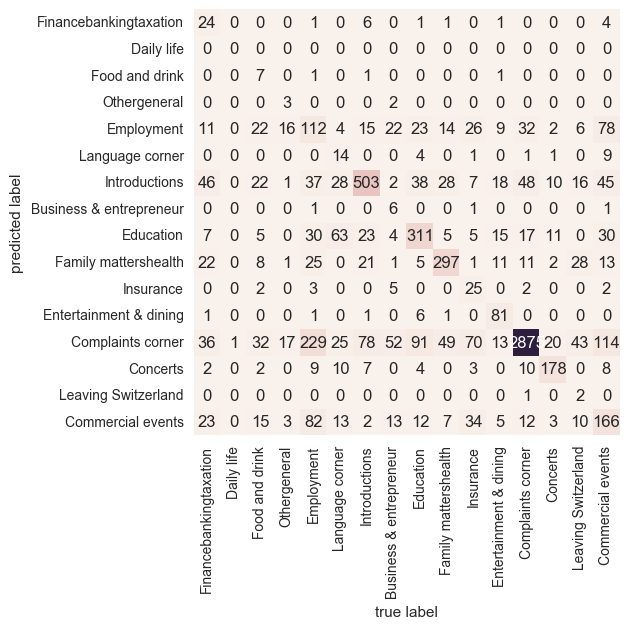

topic values {'Business & entrepreneur': 0, 'Introductions': 12, 'Employment': 6, 'Othergeneral': 15, 'Daily life': 4, 'Food and drink': 10, 'Complaints corner': 2, 'Education': 5, 'Commercial events': 1, 'Insurance': 11, 'Concerts': 3, 'Language corner': 13, 'Family mattershealth': 8, 'Entertainment & dining': 7, 'Leaving Switzerland': 14, 'Financebankingtaxation': 9}
distribution of test
 12    3009
6      657
4      531
8      495
15     470
9      402
13     227
10     173
0      172
5      157
11     154
2      115
7      107
14     105
3       41
1        1
Name: topic, dtype: int64
null accuracy
 12    0.441461
Name: topic, dtype: float64


In [34]:
import seaborn as sns
def findAppearance(obj):
    setTopics=set()
    originalValues=[]
    for i in obj:
        if i not in setTopics:
            originalValues.append(i)
            setTopics.add(i)
    for index,i in enumerate(originalValues):
        originalValues[index]=topic_encoder.inverse_transform(i)
    return originalValues
tickLabels=findAppearance(y_test)
print(tickLabels)
# print(findAppearance(y_pred_class))
# print(topicValues,print(y_pred_class.astype(set)))
# print the confusion matrix
matrix=metrics.confusion_matrix(y_test, y_pred_class)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=tickLabels, yticklabels=tickLabels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
# examine the class distribution of the testing set
print('topic values',topicValues)
print('distribution of test\n',y_test.value_counts())
# calculate null accuracy
print('null accuracy\n',y_test.value_counts().head(1) / y_test.shape)

In [292]:
# first 10 false positives
X_test[y_test < y_pred_class].head(10)

40872                                  Summer job Lausanne
33173             My luggages were stolen in Zic Zak hotel
41704    Expat thinking about moving back to Switzerlan...
467              Tips on opening a business in switzerland
6440                                         Australia Day
46949                                       Paganfest 2010
35201                         Bringing TVs back to the USA
69714                                    Dentist in valais
59023                      New Yorker - seconhand or what?
38868                   I am interested in Indian Culture.
Name: thread, dtype: object

In [293]:
# first 10 false negatives.
X_test[y_test > y_pred_class].head(10)

58063    Hello Everyone - Coming to Zurich [Looking for...
71243                Looking for Medical Laboratory-Zurich
61664          Getting rid of things quickly before moving
4729                               The best curry in Basel
20503                                                yo yo
55007      [Requirements engineering] Recommended courses?
62876                  Specifically about CSS Student Care
22297                       Seasonal Lets Winter 2009/2010
11355    Could somebody please help!!!! ( Tax form in G...
54711                             Cherry picking and enjoy
Name: thread, dtype: object

# Let's predict using K-means

In [26]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn import cross_validation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

k_means=KMeans(n_clusters=16)
# train the model using X_train_dtm
k_means.fit(X_train_dtm, y_train)
# make class predictions for X_test_dtm
y_pred_class = k_means.predict(X_test_dtm)
# calculate accuracy of class predictions
print('accuracy rate:',metrics.accuracy_score(y_test, y_pred_class))
# k_means.fit(X)
# correct=0
# for i in range(len(X)):
#     predict_me=np.array(X[i].astype(float))
# #     print(predict_me,predict_me.shape())
#     predict_me=predict_me.reshape(-1,len(predict_me))
# #     print(predict_me,predict_me.shape())
#     prediction=clf_topic.predict(predict_me)
#     if(prediction[0]==y[i]):
#         correct+=1
# print(correct/len(X))
# dfJoinShuffle_aux

accuracy rate: 0.0858274647887


In [96]:
min_max_scaler = preprocessing.MaxAbsScaler()
# for column in dfJoinShuffle_aux:
#     dfJoinShuffle_aux[column]=np_scaled = min_max_scaler.fit_transform(df)
locationsProc = preprocessing.LabelEncoder()
dfJoinShuffle_aux.location = locationsProc.fit_transform(dfJoinShuffle_aux.location)
scaled_values = min_max_scaler.fit_transform(dfJoinShuffle_aux.values)
# print(scaled_values)
# dfJoinShuffle_aux.columns
for index,column in enumerate(dfJoinShuffle_aux):
    dfJoinShuffle_aux[column]=pd.DataFrame(scaled_values)[index]
dfJoinShuffle_aux=dfJoinShuffle_aux.dropna()
# =pd.DataFrame(scaled_values)[0]
# dfJoinShuffle_aux['topic']

In [29]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.decomposition import TruncatedSVD
from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
# from sklearn.cross_validation import train_test_split

pca_shuffle = TruncatedSVD(n_components=2).fit_transform(X_train_dtm,y_train)

# # Determine your k range
# k_range = range(1,20)

# # Fit the kmeans model for each n_clusters = k
# k_means_var = [KMeans(n_clusters=k).fit(pca_shuffle) for k in k_range]

# # Pull out the cluster centers for each model
# centroids = [X.cluster_centers_ for X in k_means_var]

# # Calculate the Euclidean distance from 
# # each point to each cluster center
# k_euclid = [cdist(pca_shuffle, cent, 'euclidean') for cent in centroids]
# dist = [np.min(ke,axis=1) for ke in k_euclid]

# # Total within-cluster sum of squares
# wcss = [sum(d**2) for d in dist]

# # The total sum of squares
# tss = sum(pdist(pca_shuffle)**2)/pca_shuffle.shape[0]

# # The between-cluster sum of squares
# bss = tss - wcss

# # elbow curve
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(k_range, bss/tss*100, 'b*-')
# ax.set_ylim((0,100))
# plt.grid(True)
# plt.xlabel('n_clusters')
# plt.ylabel('Percentage of variance explained')
# plt.title('Variance Explained vs. k')
# plt.show()
# # print(pca_shuffle.shape[0],pca_shuffle.shape[1],fit1,len(fit1),dfJoinShuffle_aux.values)
# silhouette_score(fit, k_means_var[-1].labels_, metric='euclidean')
# # # fit.shape

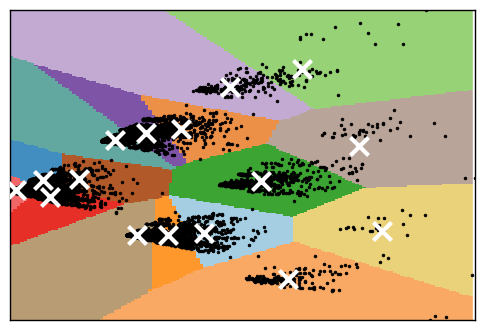

In [31]:
# run 8/random, 7/kmeans++ for silhouette
k_means = KMeans(n_clusters=16)
k_means.fit(pca_shuffle)

x_min, x_max = pca_shuffle[:, 0].min(), pca_shuffle[:, 0].max()
y_min, y_max = pca_shuffle[:, 1].min(), pca_shuffle[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(pca_shuffle[:, 0], pca_shuffle[:, 1], 'k.', markersize=4)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='w', zorder=8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
#silhouette_score(pca_shuffle,k_means.labels_, metric='euclidean') --> kernel breaks

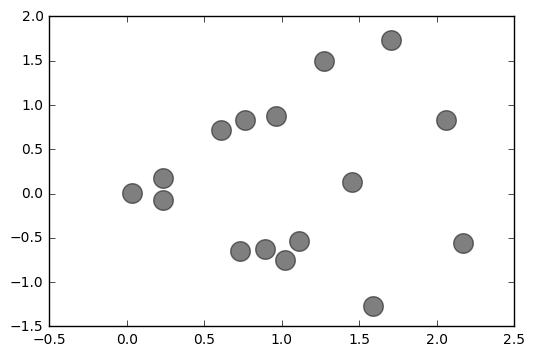

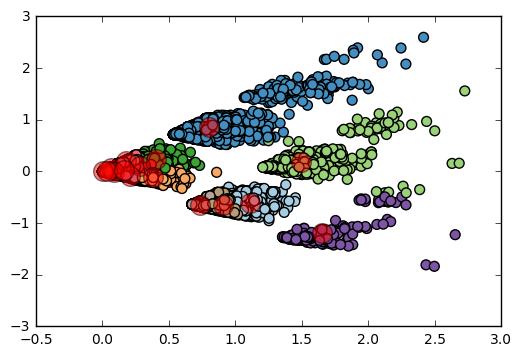

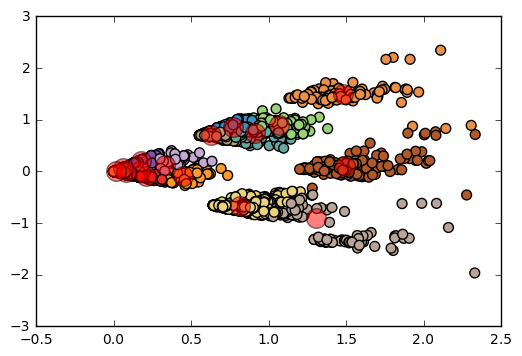

accuracy rate: 0.0264084507042


In [32]:
from sklearn.metrics import pairwise_distances_argmin
expectedPrediction=dfJoinShuffle['topic']
# min_max_scaler = preprocessing.MaxAbsScaler()

kmeans = KMeans(n_clusters=16)
kmeans.fit(pca_shuffle)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()
# method to readjust the cluster centers in order to optimize the minimum distance between centers
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest centersilhouette_score(pca_shuffle, labels, metric='euclidean')
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(pca_shuffle, 16)
plt.scatter(pca_shuffle[:, 0], pca_shuffle[:, 1], c=labels,s=50, cmap=plt.cm.Paired);
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()
pca_shuffle_test = TruncatedSVD(n_components=2).fit_transform(X_test_dtm)

prediction=kmeans.predict(pca_shuffle_test)
centers, labels = find_clusters(pca_shuffle_test, 16)
plt.scatter(pca_shuffle_test[:, 0], pca_shuffle_test[:, 1], c=labels,
            s=50,cmap=plt.cm.Paired);
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()
print('accuracy rate:',metrics.accuracy_score(y_test, prediction))